In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# Generate two classes of random points in a 2D plane
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, .5], [.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, .5], [.5, 1]], size=num_samples_per_class)

In [4]:
# Stack the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [5]:
# Generate the corresponding targets (0 and 1)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'), 
                     np.ones((num_samples_per_class, 1), dtype='float32')))

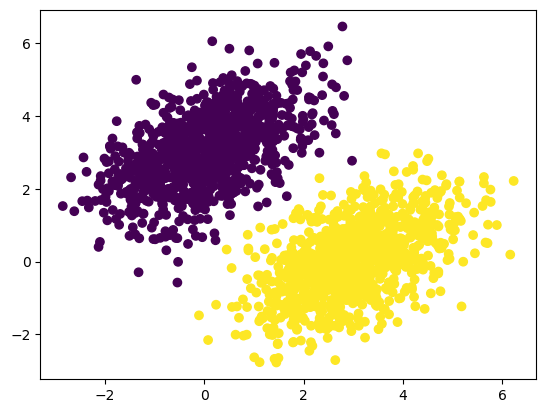

In [6]:
# Plot the two point classes
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

A linear classifier is an affine transformation

**prediction = W * input + b** (where W is two scalar coefficients and b is a single scalar coefficient)

trained to minimise the square of the difference between predictions and the targets.

In [9]:
# Create the linear classifier variables
input_dim = 2 # The inputs will be 2D points
output_dim = 1 # The output predictions will be a single score per sample
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# Create the forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

# Create the mean squared error loss function
def square_loss(targets, predictions):
    # Get a tensor with the same shape as targets and predictions, containing per-sample loss scores
    per_sample_losses = tf.square(targets - predictions)
    # Average these per-sample loss scores into a single scalar loss value
    return tf.reduce_mean(per_sample_losses)

# Create the training step function
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        # Forward pass, inside a gradient tape scope
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    # Retrieve the gradient of the loss with regard to weights
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # Update the weights
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [10]:
# Run each training step
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss: .4f}')

Loss at step 0:  4.2901
Loss at step 1:  0.7204
Loss at step 2:  0.2268
Loss at step 3:  0.1469
Loss at step 4:  0.1271
Loss at step 5:  0.1168
Loss at step 6:  0.1084
Loss at step 7:  0.1010
Loss at step 8:  0.0942
Loss at step 9:  0.0880
Loss at step 10:  0.0824
Loss at step 11:  0.0772
Loss at step 12:  0.0726
Loss at step 13:  0.0683
Loss at step 14:  0.0644
Loss at step 15:  0.0608
Loss at step 16:  0.0576
Loss at step 17:  0.0546
Loss at step 18:  0.0519
Loss at step 19:  0.0495
Loss at step 20:  0.0472
Loss at step 21:  0.0452
Loss at step 22:  0.0433
Loss at step 23:  0.0416
Loss at step 24:  0.0401
Loss at step 25:  0.0387
Loss at step 26:  0.0374
Loss at step 27:  0.0362
Loss at step 28:  0.0351
Loss at step 29:  0.0341
Loss at step 30:  0.0332
Loss at step 31:  0.0324
Loss at step 32:  0.0317
Loss at step 33:  0.0310
Loss at step 34:  0.0304
Loss at step 35:  0.0298
Loss at step 36:  0.0293
Loss at step 37:  0.0289
Loss at step 38:  0.0284
Loss at step 39:  0.0280


After 40 steps, the training loss seems to have stabilised around 0.028.

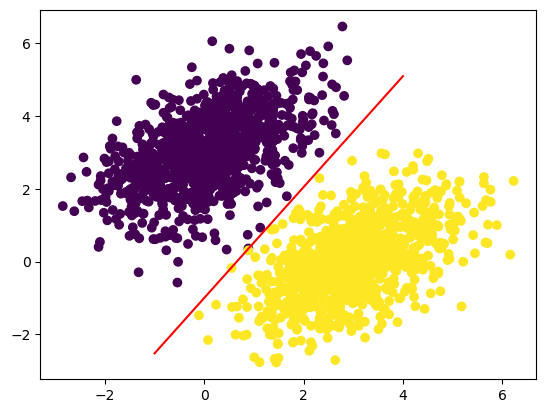

In [13]:
# Plot the separating line for the binary classification problem
x = np.linspace(-1, 4, 100) # Generate 100 regularly spaced numbers between -1 and 4
y = -W[0] / W[1] * x + (0.5 - b) / W[1] # slope * x + intercept
plt.plot(x, y, "-r")

# Plot how the linear model classifies the training data points
predictions = model(inputs)
# Because the targets are zeros and ones, 
# a given input point will be classfies as '0', if its prediction value is below 0.5, 
# and as '1' if it is above 0.5
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

plt.show()